In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform


In [2]:
BUS=pd.read_csv("OTD jan first week.csv")
BUS.head()


,route_id,route_name,trip_id,trip_name,trip_start_time,vehicle_id,approximate_route_length_km,scheduled_start_time,scheduled_end_time,unscheduled_trip
0,180,588UP,180_10_0,588UP 2021-01-04 10:00:00,04-01-2021 10:17,DL1PD0869,23.705233,04-01-2021 10:00,04-01-2021 12:12,0
1,772,182ACLDOWN,772_16_7,182ACLDOWN 2021-01-04 16:07:00,04-01-2021 16:30,DL1PC4248,27.160935,04-01-2021 16:07,04-01-2021 17:55,0
2,545,102UP,545_9_10_6790_new,102UP 2021-01-05 09:10:00,05-01-2021 09:10,DL1PD4420,22.083620,05-01-2021 09:10,05-01-2021 10:35,1
3,1182,979DOWN,1182_9_5,979DOWN 2021-01-05 09:05:00,05-01-2021 09:09,DL1PD5236,31.646352,05-01-2021 09:05,05-01-2021 11:09,0
4,538,100DOWN,538_9_31,100DOWN 2021-01-05 09:31:00,05-01-2021 09:10,DL1PD5525,16.953480,05-01-2021 09:31,05-01-2021 10:38,0


In [3]:
d_parser=lambda x:pd.datetime.strptime(x,'%d-%m-%Y %M:%S')

BUS=pd.read_csv("OTD jan first week.csv",parse_dates=["trip_start_time"],date_parser=d_parser)
BUS.head()


,route_id,route_name,trip_id,trip_name,trip_start_time,vehicle_id,approximate_route_length_km,scheduled_start_time,scheduled_end_time,unscheduled_trip
0,180,588UP,180_10_0,588UP 2021-01-04 10:00:00,2021-01-04 00:10:17,DL1PD0869,23.705233,04-01-2021 10:00,04-01-2021 12:12,0
1,772,182ACLDOWN,772_16_7,182ACLDOWN 2021-01-04 16:07:00,2021-01-04 00:16:30,DL1PC4248,27.160935,04-01-2021 16:07,04-01-2021 17:55,0
2,545,102UP,545_9_10_6790_new,102UP 2021-01-05 09:10:00,2021-01-05 00:09:10,DL1PD4420,22.083620,05-01-2021 09:10,05-01-2021 10:35,1
3,1182,979DOWN,1182_9_5,979DOWN 2021-01-05 09:05:00,2021-01-05 00:09:09,DL1PD5236,31.646352,05-01-2021 09:05,05-01-2021 11:09,0
4,538,100DOWN,538_9_31,100DOWN 2021-01-05 09:31:00,2021-01-05 00:09:10,DL1PD5525,16.953480,05-01-2021 09:31,05-01-2021 10:38,0


In [4]:
BUS.loc[0,'trip_start_time'].day_name()


'Monday'

In [5]:
BUS['trip_start_time'].dt.day_name()
BUS.head()

,route_id,route_name,trip_id,trip_name,trip_start_time,vehicle_id,approximate_route_length_km,scheduled_start_time,scheduled_end_time,unscheduled_trip
0,180,588UP,180_10_0,588UP 2021-01-04 10:00:00,2021-01-04 00:10:17,DL1PD0869,23.705233,04-01-2021 10:00,04-01-2021 12:12,0
1,772,182ACLDOWN,772_16_7,182ACLDOWN 2021-01-04 16:07:00,2021-01-04 00:16:30,DL1PC4248,27.160935,04-01-2021 16:07,04-01-2021 17:55,0
2,545,102UP,545_9_10_6790_new,102UP 2021-01-05 09:10:00,2021-01-05 00:09:10,DL1PD4420,22.083620,05-01-2021 09:10,05-01-2021 10:35,1
3,1182,979DOWN,1182_9_5,979DOWN 2021-01-05 09:05:00,2021-01-05 00:09:09,DL1PD5236,31.646352,05-01-2021 09:05,05-01-2021 11:09,0
4,538,100DOWN,538_9_31,100DOWN 2021-01-05 09:31:00,2021-01-05 00:09:10,DL1PD5525,16.953480,05-01-2021 09:31,05-01-2021 10:38,0


In [6]:
BUS["trip_start_time",]=pd.to_datetime(BUS["trip_start_time"])
BUS["trip_start_time"].head()

0   2021-01-04 00:10:17
1   2021-01-04 00:16:30
2   2021-01-05 00:09:10
3   2021-01-05 00:09:09
4   2021-01-05 00:09:10
Name: trip_start_time, dtype: datetime64[ns]

In [7]:

BUS["year"]=BUS["trip_start_time"].dt.year
BUS["day"]=BUS["trip_start_time"].dt.day
BUS["month"]=BUS["trip_start_time"].dt.month
BUS["time"]=BUS["trip_start_time"].dt.time
BUS["weekofyear"]=BUS["trip_start_time"].dt.weekofyear
BUS["minute"]=BUS["trip_start_time"].dt.minute
BUS.head()

,route_id,route_name,trip_id,trip_name,trip_start_time,vehicle_id,approximate_route_length_km,scheduled_start_time,scheduled_end_time,unscheduled_trip,"(trip_start_time,)",year,day,month,time,weekofyear,minute
0,180,588UP,180_10_0,588UP 2021-01-04 10:00:00,2021-01-04 00:10:17,DL1PD0869,23.705233,04-01-2021 10:00,04-01-2021 12:12,0,2021-01-04 00:10:17,2021,4,1,00:10:17,1,10
1,772,182ACLDOWN,772_16_7,182ACLDOWN 2021-01-04 16:07:00,2021-01-04 00:16:30,DL1PC4248,27.160935,04-01-2021 16:07,04-01-2021 17:55,0,2021-01-04 00:16:30,2021,4,1,00:16:30,1,16
2,545,102UP,545_9_10_6790_new,102UP 2021-01-05 09:10:00,2021-01-05 00:09:10,DL1PD4420,22.083620,05-01-2021 09:10,05-01-2021 10:35,1,2021-01-05 00:09:10,2021,5,1,00:09:10,1,9
3,1182,979DOWN,1182_9_5,979DOWN 2021-01-05 09:05:00,2021-01-05 00:09:09,DL1PD5236,31.646352,05-01-2021 09:05,05-01-2021 11:09,0,2021-01-05 00:09:09,2021,5,1,00:09:09,1,9
4,538,100DOWN,538_9_31,100DOWN 2021-01-05 09:31:00,2021-01-05 00:09:10,DL1PD5525,16.953480,05-01-2021 09:31,05-01-2021 10:38,0,2021-01-05 00:09:10,2021,5,1,00:09:10,1,9


In [8]:
d_parser=lambda x:pd.datetime.strptime(x,'%d-%m-%Y %M:%S')

BUS2=pd.read_csv("OTD jan first week.csv",parse_dates=["scheduled_end_time"],date_parser=d_parser)
BUS2.head()


,route_id,route_name,trip_id,trip_name,trip_start_time,vehicle_id,approximate_route_length_km,scheduled_start_time,scheduled_end_time,unscheduled_trip
0,180,588UP,180_10_0,588UP 2021-01-04 10:00:00,04-01-2021 10:17,DL1PD0869,23.705233,04-01-2021 10:00,2021-01-04 00:12:12,0
1,772,182ACLDOWN,772_16_7,182ACLDOWN 2021-01-04 16:07:00,04-01-2021 16:30,DL1PC4248,27.160935,04-01-2021 16:07,2021-01-04 00:17:55,0
2,545,102UP,545_9_10_6790_new,102UP 2021-01-05 09:10:00,05-01-2021 09:10,DL1PD4420,22.083620,05-01-2021 09:10,2021-01-05 00:10:35,1
3,1182,979DOWN,1182_9_5,979DOWN 2021-01-05 09:05:00,05-01-2021 09:09,DL1PD5236,31.646352,05-01-2021 09:05,2021-01-05 00:11:09,0
4,538,100DOWN,538_9_31,100DOWN 2021-01-05 09:31:00,05-01-2021 09:10,DL1PD5525,16.953480,05-01-2021 09:31,2021-01-05 00:10:38,0


In [9]:
BUS2.loc[0,'scheduled_end_time'].day_name()

'Monday'

In [10]:
BUS2['scheduled_end_time'].dt.day_name()
BUS2.head()

,route_id,route_name,trip_id,trip_name,trip_start_time,vehicle_id,approximate_route_length_km,scheduled_start_time,scheduled_end_time,unscheduled_trip
0,180,588UP,180_10_0,588UP 2021-01-04 10:00:00,04-01-2021 10:17,DL1PD0869,23.705233,04-01-2021 10:00,2021-01-04 00:12:12,0
1,772,182ACLDOWN,772_16_7,182ACLDOWN 2021-01-04 16:07:00,04-01-2021 16:30,DL1PC4248,27.160935,04-01-2021 16:07,2021-01-04 00:17:55,0
2,545,102UP,545_9_10_6790_new,102UP 2021-01-05 09:10:00,05-01-2021 09:10,DL1PD4420,22.083620,05-01-2021 09:10,2021-01-05 00:10:35,1
3,1182,979DOWN,1182_9_5,979DOWN 2021-01-05 09:05:00,05-01-2021 09:09,DL1PD5236,31.646352,05-01-2021 09:05,2021-01-05 00:11:09,0
4,538,100DOWN,538_9_31,100DOWN 2021-01-05 09:31:00,05-01-2021 09:10,DL1PD5525,16.953480,05-01-2021 09:31,2021-01-05 00:10:38,0


In [11]:
BUS2["scheduled_end_time",]=pd.to_datetime(BUS2["scheduled_end_time"])
BUS2["scheduled_end_time"].head()

0   2021-01-04 00:12:12
1   2021-01-04 00:17:55
2   2021-01-05 00:10:35
3   2021-01-05 00:11:09
4   2021-01-05 00:10:38
Name: scheduled_end_time, dtype: datetime64[ns]

In [12]:
BUS2["minute"]=BUS2["scheduled_end_time"].dt.minute

BUS2.head()

,route_id,route_name,trip_id,trip_name,trip_start_time,vehicle_id,approximate_route_length_km,scheduled_start_time,scheduled_end_time,unscheduled_trip,"(scheduled_end_time,)",minute
0,180,588UP,180_10_0,588UP 2021-01-04 10:00:00,04-01-2021 10:17,DL1PD0869,23.705233,04-01-2021 10:00,2021-01-04 00:12:12,0,2021-01-04 00:12:12,12
1,772,182ACLDOWN,772_16_7,182ACLDOWN 2021-01-04 16:07:00,04-01-2021 16:30,DL1PC4248,27.160935,04-01-2021 16:07,2021-01-04 00:17:55,0,2021-01-04 00:17:55,17
2,545,102UP,545_9_10_6790_new,102UP 2021-01-05 09:10:00,05-01-2021 09:10,DL1PD4420,22.083620,05-01-2021 09:10,2021-01-05 00:10:35,1,2021-01-05 00:10:35,10
3,1182,979DOWN,1182_9_5,979DOWN 2021-01-05 09:05:00,05-01-2021 09:09,DL1PD5236,31.646352,05-01-2021 09:05,2021-01-05 00:11:09,0,2021-01-05 00:11:09,11
4,538,100DOWN,538_9_31,100DOWN 2021-01-05 09:31:00,05-01-2021 09:10,DL1PD5525,16.953480,05-01-2021 09:31,2021-01-05 00:10:38,0,2021-01-05 00:10:38,10


In [13]:
BUS3=BUS['minute']-BUS2['minute']
BUS3.head()

0   -2
1   -1
2   -1
3   -2
4   -1
Name: minute, dtype: int64

In [14]:
BUS['waiting time']=BUS3
BUS.head()

,route_id,route_name,trip_id,trip_name,trip_start_time,vehicle_id,approximate_route_length_km,scheduled_start_time,scheduled_end_time,unscheduled_trip,"(trip_start_time,)",year,day,month,time,weekofyear,minute,waiting time
0,180,588UP,180_10_0,588UP 2021-01-04 10:00:00,2021-01-04 00:10:17,DL1PD0869,23.705233,04-01-2021 10:00,04-01-2021 12:12,0,2021-01-04 00:10:17,2021,4,1,00:10:17,1,10,-2
1,772,182ACLDOWN,772_16_7,182ACLDOWN 2021-01-04 16:07:00,2021-01-04 00:16:30,DL1PC4248,27.160935,04-01-2021 16:07,04-01-2021 17:55,0,2021-01-04 00:16:30,2021,4,1,00:16:30,1,16,-1
2,545,102UP,545_9_10_6790_new,102UP 2021-01-05 09:10:00,2021-01-05 00:09:10,DL1PD4420,22.083620,05-01-2021 09:10,05-01-2021 10:35,1,2021-01-05 00:09:10,2021,5,1,00:09:10,1,9,-1
3,1182,979DOWN,1182_9_5,979DOWN 2021-01-05 09:05:00,2021-01-05 00:09:09,DL1PD5236,31.646352,05-01-2021 09:05,05-01-2021 11:09,0,2021-01-05 00:09:09,2021,5,1,00:09:09,1,9,-2
4,538,100DOWN,538_9_31,100DOWN 2021-01-05 09:31:00,2021-01-05 00:09:10,DL1PD5525,16.953480,05-01-2021 09:31,05-01-2021 10:38,0,2021-01-05 00:09:10,2021,5,1,00:09:10,1,9,-1


# i)

In [15]:
mask=BUS['unscheduled_trip']==1
bus=BUS[mask]
bus.head()


,route_id,route_name,trip_id,trip_name,trip_start_time,vehicle_id,approximate_route_length_km,scheduled_start_time,scheduled_end_time,unscheduled_trip,"(trip_start_time,)",year,day,month,time,weekofyear,minute,waiting time
2,545,102UP,545_9_10_6790_new,102UP 2021-01-05 09:10:00,2021-01-05 00:09:10,DL1PD4420,22.083620,05-01-2021 09:10,05-01-2021 10:35,1,2021-01-05 00:09:10,2021,5,1,00:09:10,1,9,-1
10,978,772STLDOWN,978_9_9_8580_new,772STLDOWN 2021-01-05 09:09:00,2021-01-05 00:09:09,DL1PD4638,10.666820,05-01-2021 09:09,05-01-2021 09:52,1,2021-01-05 00:09:09,2021,5,1,00:09:09,1,9,0
13,481,214CLUP,481_9_9_2849_new,214CLUP 2021-01-05 09:09:00,2021-01-05 00:09:09,DL1PC4798,17.249065,05-01-2021 09:09,05-01-2021 10:43,1,2021-01-05 00:09:09,2021,5,1,00:09:09,1,9,-1
17,961,741DOWN,961_9_9_7334_new,741DOWN 2021-01-05 09:09:00,2021-01-05 00:09:09,DL1PD5215,29.866931,05-01-2021 09:09,05-01-2021 11:08,1,2021-01-05 00:09:09,2021,5,1,00:09:09,1,9,-2
26,399,717AUP,399_9_58_9768_new,717AUP 2021-01-02 09:58:00,2021-01-02 00:09:58,DL1PC6393,30.954153,02-01-2021 09:58,02-01-2021 12:56,1,2021-01-02 00:09:58,2021,2,1,00:09:58,53,9,-3


In [16]:
bus=BUS['route_name']
bus.head()

0         588UP
1    182ACLDOWN
2         102UP
3       979DOWN
4       100DOWN
Name: route_name, dtype: object

# ii)

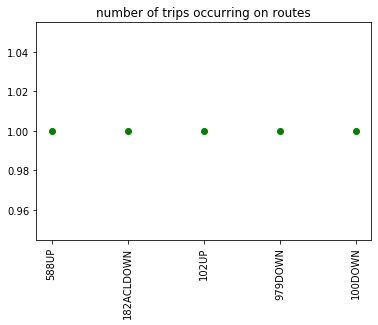

In [17]:

plt.plot(BUS.route_name.head(),BUS.weekofyear.head(),'o',color='green')
plt.xticks(rotation=90);
plt.title("number of trips occurring on routes") 
plt.show()

# iii) 

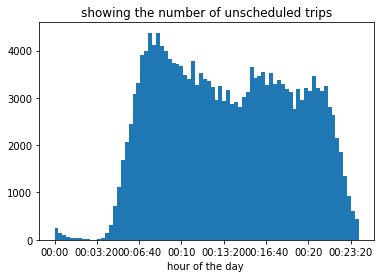

In [18]:
%matplotlib inline  
plt.hist(BUS['time'], bins='auto');
plt.xlabel("hour of the day ")
plt.title("showing the number of unscheduled trips")
plt.show()


# iv)

In [ ]:
sns.histplot(x='approximate_route_length_km',y='trip_name',data=BUS);

# v)

In [19]:
df=BUS[['approximate_route_length_km','trip_name']]
df.head(3)

,approximate_route_length_km,trip_name
0,23.705233,588UP 2021-01-04 10:00:00
1,27.160935,182ACLDOWN 2021-01-04 16:07:00
2,22.083620,102UP 2021-01-05 09:10:00


In [20]:
distance=BUS['approximate_route_length_km']
trip=BUS['trip_name']

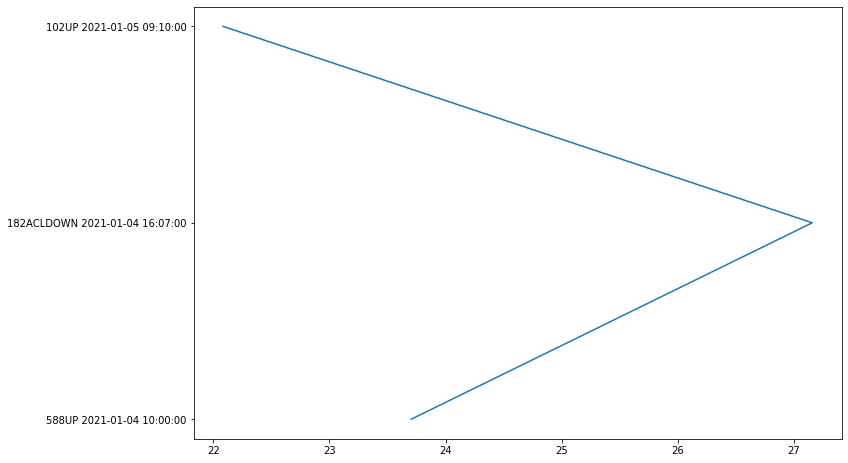

In [21]:
fig=plt.figure()
axes=fig.add_axes([1.3,1.3,1.5,1.5])
axes.plot(distance.head(3),trip.head(3))

# vi)

In [ ]:
sns.histplot(x='trip_id',y='route_id',data=BUS,bins=10);

# vii)

# a)

In [22]:
time_distance=BUS['waiting time']
tripstarttime=BUS['trip_start_time']

C:\Users\ankita\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


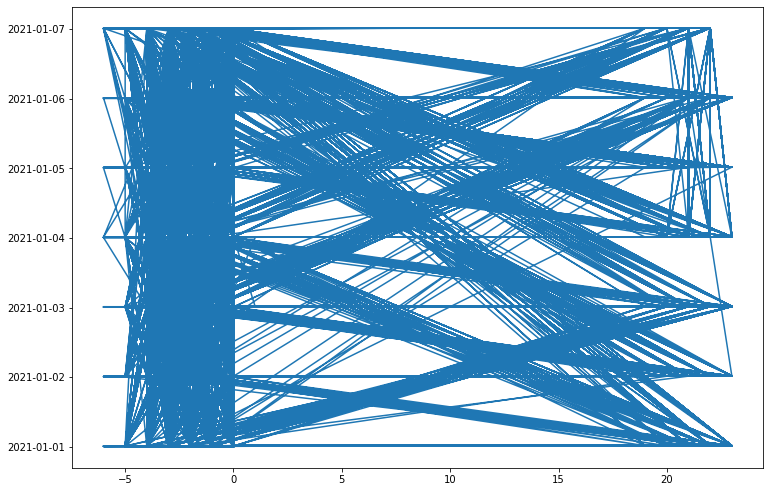

In [23]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,1.6,1.6])
axes.plot(time_distance,tripstarttime)

# b)

In [24]:
w=BUS['waiting time']
w.mean()

-1.1566898934758512

In [25]:
DAY=BUS['day']
route=BUS['route_id']

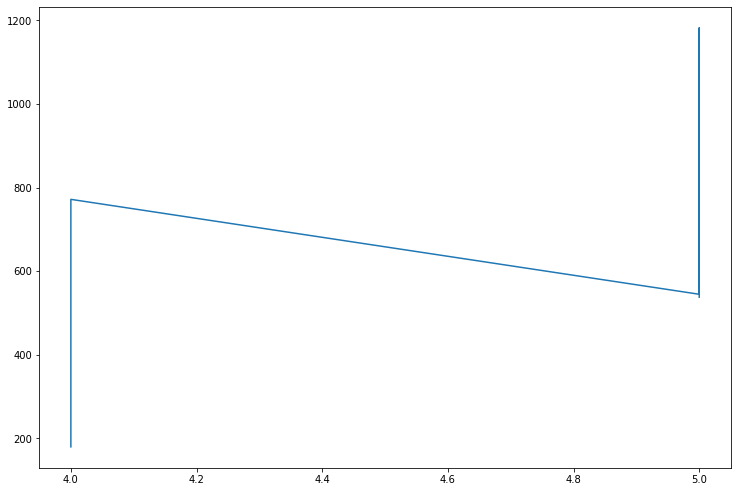

In [26]:
fig=plt.figure()
axes=fig.add_axes([1.3,1.3,1.6,1.6])
axes.plot(DAY.head(),route.head())

# viii)

In [27]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(BUS.isnull().sum())
missing_val
#Reset index
missing_val = missing_val.reset_index()
missing_val
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(BUS))*100
missing_val
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val
#save output results 
missing_val.to_csv("Miising_perc.csv", index = False)
missing_val

,Variables,Missing_percentage
0,route_id,0.0
1,route_name,0.0
2,minute,0.0
3,weekofyear,0.0
4,time,0.0
5,month,0.0
6,day,0.0
7,year,0.0
8,"(trip_start_time,)",0.0
9,unscheduled_trip,0.0


In [28]:
#Assigning levels to the categories
lis = []
for i in range(0, BUS.shape[1]):

    if(BUS.iloc[:,i].dtypes == 'object'): #[allrows, nthcol] type is 'object'
        BUS.iloc[:,i] = pd.Categorical(BUS.iloc[:,i]) #covert col to categoryal variable

        BUS.iloc[:,i] = BUS.iloc[:,i].cat.codes #make category of observation
        BUS.iloc[:,i] = BUS.iloc[:,i].astype('object')
        
        lis.append(BUS.columns[i])
lis 

['route_name',
 'trip_id',
 'trip_name',
 'vehicle_id',
 'scheduled_start_time',
 'scheduled_end_time',
 'time']

In [29]:
for i in range(0, BUS.shape[1]):
    BUS.iloc[:,i] = BUS.iloc[:,i].replace(-1, np.nan) 

In [30]:
BUS = BUS.fillna(BUS.median())
BUS['route_id'].loc[4]

538

In [31]:
df = BUS.copy()
BUS = df.copy()
BUS.head()

,route_id,route_name,trip_id,trip_name,trip_start_time,vehicle_id,approximate_route_length_km,scheduled_start_time,scheduled_end_time,unscheduled_trip,"(trip_start_time,)",year,day,month,time,weekofyear,minute,waiting time
0,180,578,16382,104838,2021-01-04 00:10:17,1111,23.705233,4201,4493,0,2021-01-04 00:10:17,2021,4,1,554,1,10,-2.0
1,772,263,57983,39949,2021-01-04 00:16:30,65,27.160935,4568,4836,0,2021-01-04 00:16:30,2021,4,1,927,1,16,-2.0
2,545,15,44218,2358,2021-01-05 00:09:10,1950,22.083620,5421,5726,1,2021-01-05 00:09:10,2021,5,1,487,1,9,-2.0
3,1182,1025,10343,181553,2021-01-05 00:09:09,2675,31.646352,5416,5760,0,2021-01-05 00:09:09,2021,5,1,486,1,9,-2.0
4,538,4,43478,760,2021-01-05 00:09:10,2885,16.953480,5442,5729,0,2021-01-05 00:09:10,2021,5,1,487,1,9,-2.0
